In [30]:
import pandas as pd
import seaborn as sns
import numpy
import matplotlib.pyplot as plt

sns.set_theme()

In [31]:
filename = "comparison_2"

In [32]:
results = pd.read_csv(f"../results/{filename}.csv")

### Best by score


In [33]:
results["score"] = results.apply(
    lambda x: 10_000 * x.accuracy - 200 * x.n_features, axis=1
)

best_by_score = (
    results.sort_values("score", ascending=False)
    .groupby(["feature_selector", "classifier", "n_features"])
    .first()
    .reset_index()
)[
    [
        "feature_selector",
        "classifier",
        "n_features",
        "accuracy",
        "accuracy_top_20pc",
        "score",
    ]
]

best_by_score.sort_values("score", ascending=False).head(10)

,feature_selector,classifier,n_features,accuracy,accuracy_top_20pc,score
20,SelectFromModel,RandomForestClassifier,5,0.6814,0.737,5814.0
5,SelectFromModel,GradientBoostingClassifier,6,0.7008,0.766,5808.0
2,SelectFromModel,GradientBoostingClassifier,3,0.6394,0.713,5794.0
4,SelectFromModel,GradientBoostingClassifier,5,0.6790,0.768,5790.0
3,SelectFromModel,GradientBoostingClassifier,4,0.6552,0.755,5752.0
21,SelectFromModel,RandomForestClassifier,6,0.6890,0.756,5690.0
19,SelectFromModel,RandomForestClassifier,4,0.6470,0.706,5670.0
1,SelectFromModel,GradientBoostingClassifier,2,0.6026,0.689,5626.0
6,SelectFromModel,GradientBoostingClassifier,7,0.6946,0.779,5546.0
22,SelectFromModel,RandomForestClassifier,7,0.6946,0.750,5546.0


### Plots


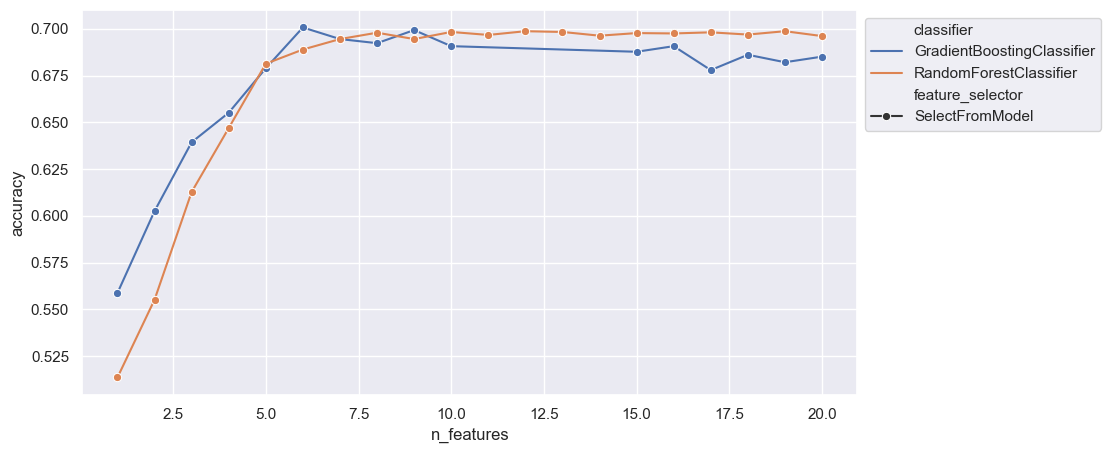

In [34]:
best_by_acc = (
    results.sort_values("accuracy", ascending=False)
    .groupby(["feature_selector", "classifier", "n_features"])
    .first()
    .reset_index()
)

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    best_by_acc,
    x="n_features",
    y="accuracy",
    hue="classifier",
    style="feature_selector",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

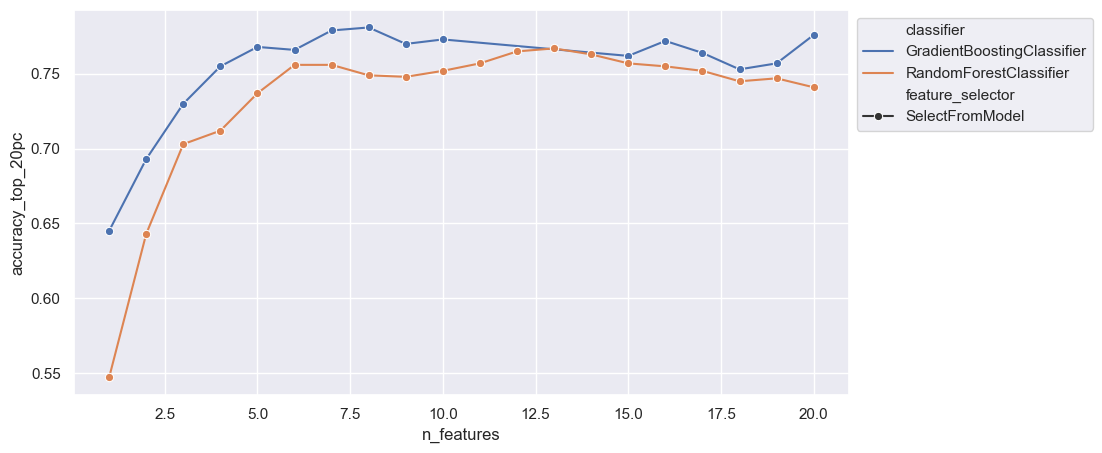

In [35]:
best_by_acc_top_20pc = (
    results.sort_values("accuracy_top_20pc", ascending=False)
    .groupby(["feature_selector", "classifier", "n_features"])
    .first()
    .reset_index()
)

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    best_by_acc_top_20pc,
    x="n_features",
    y="accuracy_top_20pc",
    hue="classifier",
    style="feature_selector",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

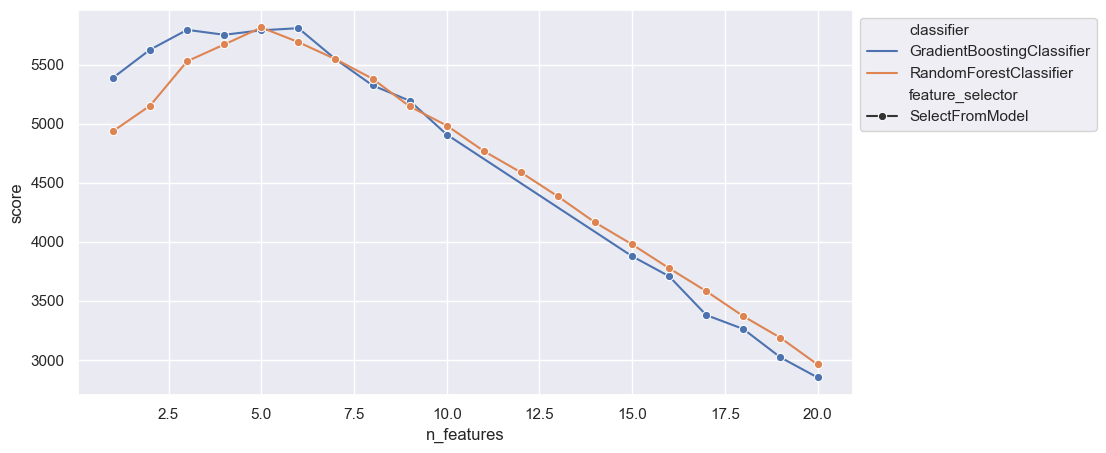

In [36]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    best_by_score,
    x="n_features",
    y="score",
    hue="classifier",
    style="feature_selector",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()